✅ File tồn tại, tiếp tục đọc dữ liệu.
        Ngày  Số hóa đơn  Tổng tiền (VNĐ) Số khách  Tổng số món  \
0   01/02/25       120.0         18000000      110        340.0   
1   02/02/25        98.0         15500000      NaN        290.0   
2   03/02/25         NaN         16200000      102        310.0   
3   04/02/25       130.0         -1800000      125        380.0   
4   05/02/25       115.0         17300000      110        350.0   
5   06/02/25       140.0         21000000      135          NaN   
6   07/02/25        95.0         14800000      abc        280.0   
7   08/02/25       125.0                0      120        360.0   
8   09/02/25       110.0         17500000      105        320.0   
9   10/02/25       101.0         16800000       98        295.0   
10  11/02/25        98.0         10120450      121        398.0   
11  12/02/25       101.0         19487021       94        298.0   
12  13/02/25       134.0         16464214      126        296.0   
13  14/02/25       128.0

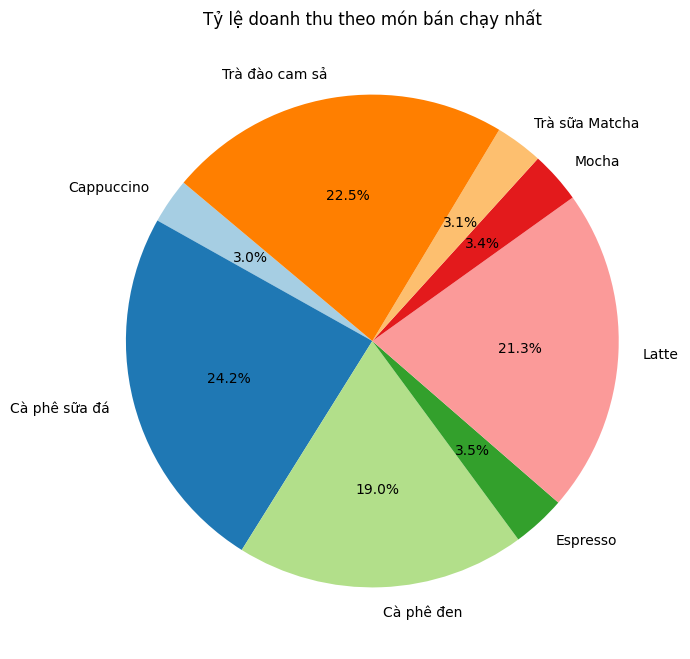

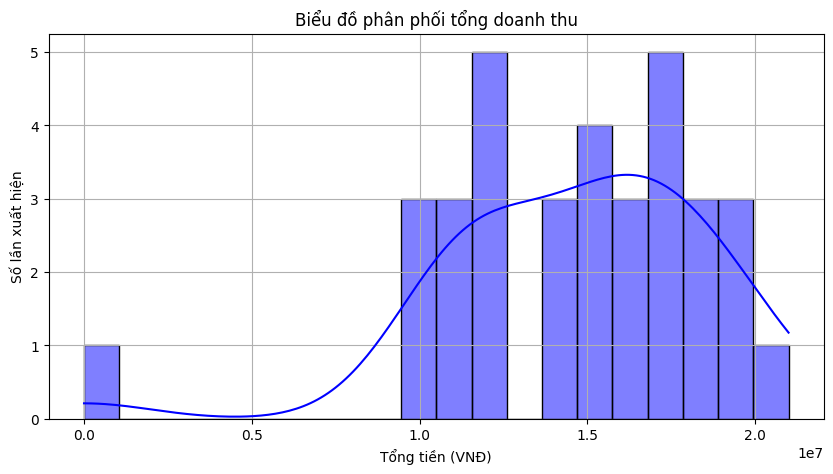

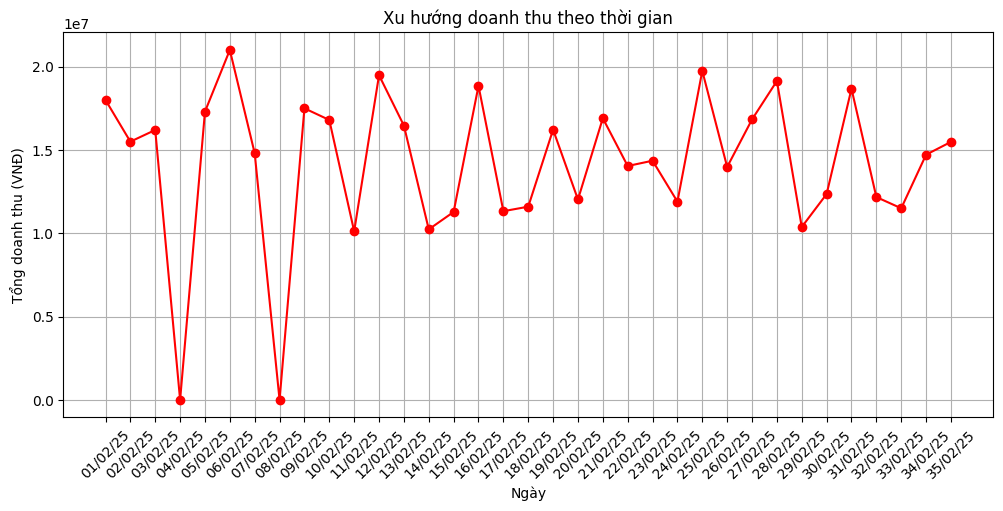

Phương trình hồi quy: y = 25093630.73 + -32712.70x
Hệ số chặn (beta_0): 25093630.733088285
Hệ số dốc (beta_1): -32712.69591230851
Hệ số xác định (R^2): 0.10415897547491837
Sai số bình phương trung bình (MSE): 13391259222156.186


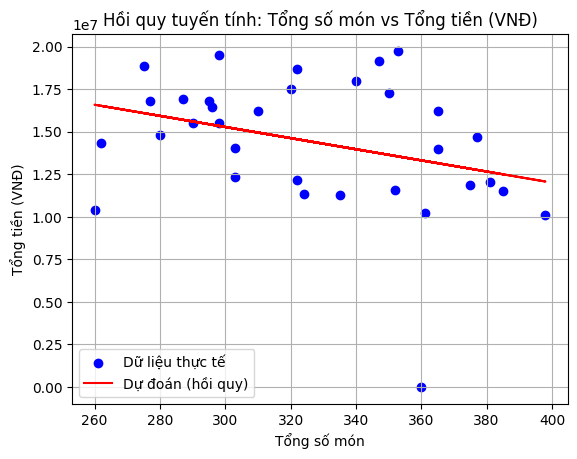

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#--
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Đường dẫn file Excel
file_path = "/content/sample_data/CNTT1701_NGUYỄN-THANH-BÌNH_BKT2.xlsx"

# Kiểm tra xem file có tồn tại không
if os.path.exists(file_path):
    print("✅ File tồn tại, tiếp tục đọc dữ liệu.")
else:
    print("⚠️ File không tồn tại, kiểm tra lại đường dẫn!")

# Đọc dữ liệu từ file Excel
df = pd.read_excel(file_path)

# Hiển thị 25 dòng đầu tiên
print(df.head(25))

# Xem thông tin tổng quan về dữ liệu
print(df.info())

# Chuyển đổi cột 'Tổng tiền (VNĐ)' sang kiểu số (loại bỏ lỗi định dạng nếu có)
df['Tổng tiền (VNĐ)'] = pd.to_numeric(df['Tổng tiền (VNĐ)'], errors='coerce')

# Thay thế giá trị âm và bất hợp lý trong 'Tổng tiền (VNĐ)'
df['Tổng tiền (VNĐ)'] = df['Tổng tiền (VNĐ)'].apply(lambda x: x if x >= 0 else None)

# Chuyển đổi dữ liệu không hợp lệ thành NaN
df.replace({'Số khách': {'abc': None}, 'Doanh thu trung bình/hóa đơn (VNĐ)': {'???': None}}, inplace=True)
df['Số hóa đơn'] = pd.to_numeric(df['Số hóa đơn'], errors='coerce')
df['Số khách'] = pd.to_numeric(df['Số khách'], errors='coerce')
df['Tổng số món'] = pd.to_numeric(df['Tổng số món'], errors='coerce')
df['Doanh thu trung bình/hóa đơn (VNĐ)'] = pd.to_numeric(df['Doanh thu trung bình/hóa đơn (VNĐ)'], errors='coerce')

# Tính toán trung bình, phương sai và độ lệch chuẩn
trung_binh = df['Tổng tiền (VNĐ)'].mean()
phuong_sai = df['Tổng tiền (VNĐ)'].var()
do_lech_chuan = df['Tổng tiền (VNĐ)'].std()

# In kết quả
print(f"Trung bình: {trung_binh:.2f} VND")
print(f"Phương sai: {phuong_sai:.2f} VND^2")
print(f"Độ lệch chuẩn: {do_lech_chuan:.2f} VND")

# Kiểm tra các giá trị thiếu
print("Số giá trị thiếu trong từng cột:")
print(df.isnull().sum())

# Kiểm tra dữ liệu trùng lặp
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp: {duplicate_count}")

# Xem một số thống kê của dữ liệu
print(df.describe(include="all"))

# Tính tổng doanh thu theo từng món bán chạy nhất
product_sales = df.groupby("Món bán chạy nhất")['Tổng tiền (VNĐ)'].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(product_sales, labels=product_sales.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Tỷ lệ doanh thu theo món bán chạy nhất")
plt.show()

# Biểu đồ phân phối tổng doanh thu
plt.figure(figsize=(10, 5))
sns.histplot(df["Tổng tiền (VNĐ)"], bins=20, kde=True, color="blue")
plt.xlabel("Tổng tiền (VNĐ)")
plt.ylabel("Số lần xuất hiện")
plt.title("Biểu đồ phân phối tổng doanh thu")
plt.grid(True)
plt.show()

# Biểu đồ xu hướng doanh thu theo thời gian
daily_sales = df.groupby("Ngày")["Tổng tiền (VNĐ)"].sum()
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker="o", linestyle="-", color="red")
plt.xlabel("Ngày")
plt.ylabel("Tổng doanh thu (VNĐ)")
plt.title("Xu hướng doanh thu theo thời gian")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ---- Hồi quy tuyến tính ----

# Chuyển dữ liệu thành DataFrame (đã có df rồi)
# Sử dụng "Tổng số món" làm biến độc lập và "Tổng tiền (VNĐ)" làm biến phụ thuộc
# Lưu ý: Loại bỏ các dòng có giá trị NaN trong các cột liên quan
regression_df = df.dropna(subset=["Tổng số món", "Tổng tiền (VNĐ)"])

X = regression_df["Tổng số món"].values.reshape(-1, 1)
y = regression_df["Tổng tiền (VNĐ)"].values

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị
y_pred = model.predict(X)

# Tính toán các hệ số hồi quy
beta_0 = model.intercept_  # Hệ số chặn
beta_1 = model.coef_[0]    # Hệ số dốc

# Đánh giá mô hình
r2 = r2_score(y, y_pred)  # Hệ số xác định R^2
mse = mean_squared_error(y, y_pred)  # Sai số bình phương trung bình (MSE)

# Hiển thị kết quả
print(f"Phương trình hồi quy: y = {beta_0:.2f} + {beta_1:.2f}x")
print(f"Hệ số chặn (beta_0): {beta_0}")
print(f"Hệ số dốc (beta_1): {beta_1}")
print(f"Hệ số xác định (R^2): {r2}")
print(f"Sai số bình phương trung bình (MSE): {mse}")

# Vẽ biểu đồ hồi quy
plt.scatter(X, y, color="blue", label="Dữ liệu thực tế")
plt.plot(X, y_pred, color="red", label="Dự đoán (hồi quy)")
plt.title("Hồi quy tuyến tính: Tổng số món vs Tổng tiền (VNĐ)")
plt.xlabel("Tổng số món")
plt.ylabel("Tổng tiền (VNĐ)")
plt.legend()
plt.grid(True)
plt.show()
